In [13]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_c930604ce6224217a4557cf932839f5c = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9PR4TdvfLAfrZOgpECeJNqv3lNYyDwKacksGn2ezEKDZ',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu.cloud-object-storage.appdomain.cloud')

body = client_c930604ce6224217a4557cf932839f5c.get_object(Bucket='estimateimpurities-donotdelete-pr-dbfopkjaqszf6c',Key='Mining_Dataset.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

mining_data = pd.read_csv(body,decimal=',',parse_dates=["date"],infer_datetime_format=True, sep=',')
mining_data.head()


,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [14]:
import numpy as np

In [15]:
# Description of the Dataset
mining_data.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,...,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000
mean,56.294739,14.651716,2869.140569,488.144697,397.578372,9.767639,1.680380,280.151856,277.159965,281.082397,...,290.754856,520.244823,522.649555,531.352662,420.320973,425.251706,429.941018,421.021231,65.050068,2.326763
std,5.157744,6.807439,1215.203734,91.230534,9.699785,0.387007,0.069249,29.621288,30.149357,28.558268,...,28.670105,131.014924,128.165050,150.842164,91.794432,84.535822,89.862225,84.891491,1.118645,1.125554
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2076.320000,431.796000,394.264000,9.527360,1.647310,250.281000,250.457000,250.855000,...,256.302000,416.978000,441.883000,411.325000,356.679000,357.653000,358.497000,356.772000,64.370000,1.440000
50%,56.080000,13.850000,3018.430000,504.393000,399.249000,9.798100,1.697600,299.344000,296.223000,298.696000,...,299.011000,491.878000,495.956000,494.318000,411.974000,408.773000,424.664575,411.065000,65.210000,2.000000
75%,59.720000,19.600000,3727.730000,553.257000,402.968000,10.038000,1.728330,300.149000,300.690000,300.382000,...,301.904000,594.114000,595.464000,601.249000,485.549000,484.329000,492.684000,476.465000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.644000,698.861000,659.902000,68.010000,5.530000


In [16]:
#checking and removal of existing negative values in the dataset
for cols in mining_data.columns.tolist()[1:]:
    df = mining_data.loc[mining_data[cols] > 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          737453 non-null  datetime64[ns]
 1   % Iron Feed                   737453 non-null  float64       
 2   % Silica Feed                 737453 non-null  float64       
 3   Starch Flow                   737453 non-null  float64       
 4   Amina Flow                    737453 non-null  float64       
 5   Ore Pulp Flow                 737453 non-null  float64       
 6   Ore Pulp pH                   737453 non-null  float64       
 7   Ore Pulp Density              737453 non-null  float64       
 8   Flotation Column 01 Air Flow  737453 non-null  float64       
 9   Flotation Column 02 Air Flow  737453 non-null  float64       
 10  Flotation Column 03 Air Flow  737453 non-null  float64       
 11  Flotation Col

In [17]:
# Indexing of Date Colomn
df=df.set_index('date')

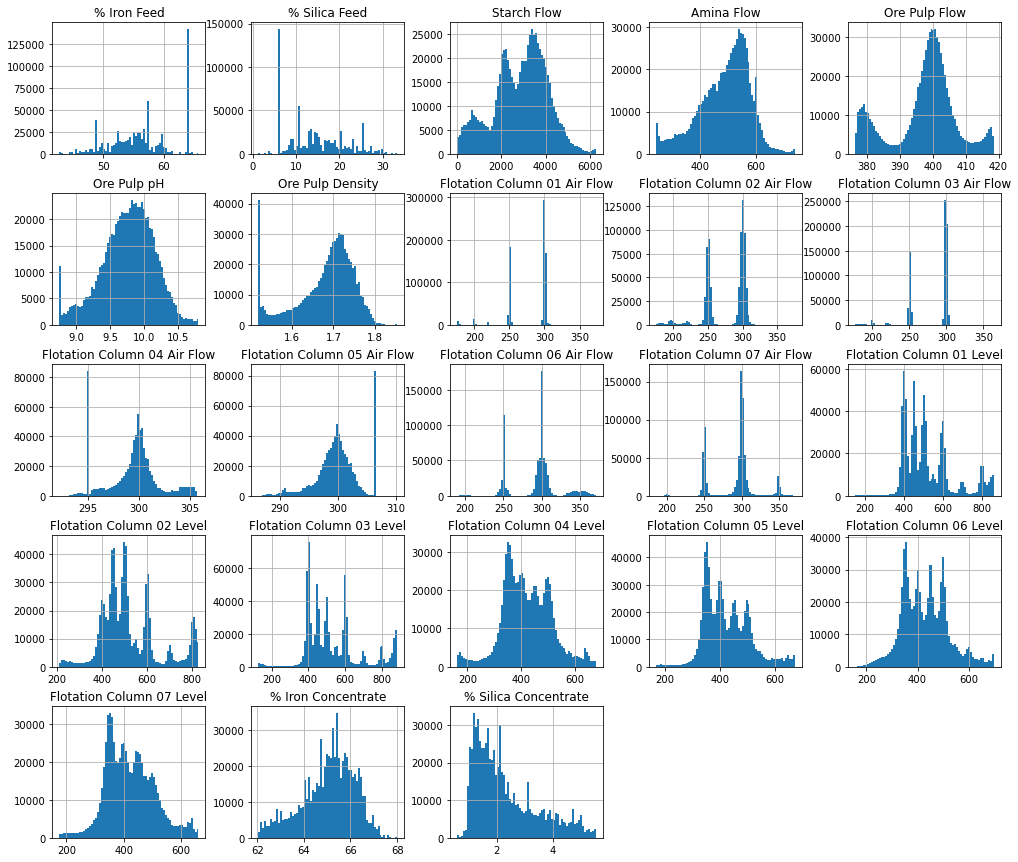

Text(0.5, 0.98, 'figure title')

<Figure size 432x288 with 0 Axes>

In [18]:
# Visualize data distribution to identify whether outliers exist
import matplotlib.pyplot as plt
from matplotlib import style
df.hist(bins = 70, figsize = (17,15))
plt.show()
plt.suptitle('figure title', color='w')

In [19]:
df.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [20]:
#Removal of Outliers using z-score method & datapoints lying outside 2 standard deviations 
df_copy=df
from scipy import stats
df_copy=df[(np.abs(stats.zscore(df)) < 2).all(axis=1)]
df_copy.info()

#For each column, first it computes the Z-score of each value in the column, relative to the column mean and standard deviation.
#Then is takes the absolute of Z-score because the direction does not matter, only if it is below the threshold.
#all(axis=1) ensures that for each row, all column satisfy the constraint.
#Finally, result of this condition is used to index the dataframe.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 346475 entries, 2017-03-10 01:00:00 to 2017-09-09 22:00:00
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   346475 non-null  float64
 1   % Silica Feed                 346475 non-null  float64
 2   Starch Flow                   346475 non-null  float64
 3   Amina Flow                    346475 non-null  float64
 4   Ore Pulp Flow                 346475 non-null  float64
 5   Ore Pulp pH                   346475 non-null  float64
 6   Ore Pulp Density              346475 non-null  float64
 7   Flotation Column 01 Air Flow  346475 non-null  float64
 8   Flotation Column 02 Air Flow  346475 non-null  float64
 9   Flotation Column 03 Air Flow  346475 non-null  float64
 10  Flotation Column 04 Air Flow  346475 non-null  float64
 11  Flotation Column 05 Air Flow  346475 non-null  float64
 12  Flotation 

In [21]:
df_copy.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


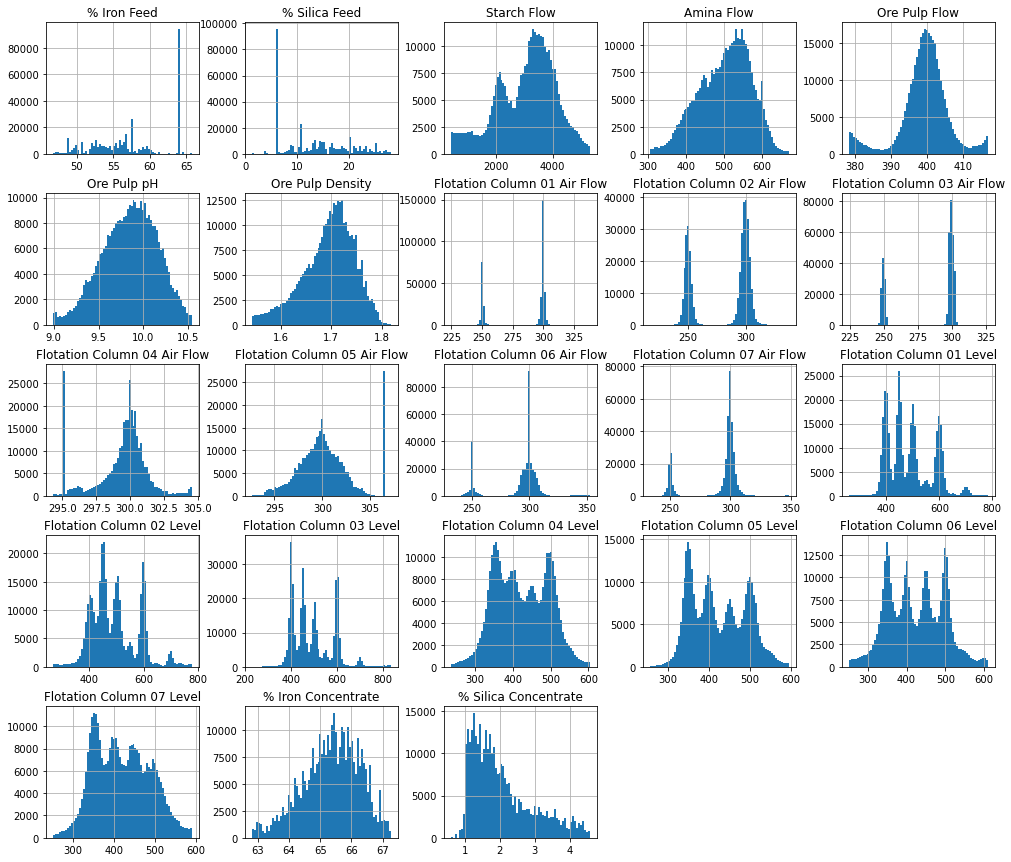

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 346475 entries, 2017-03-10 01:00:00 to 2017-09-09 22:00:00
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   346475 non-null  float64
 1   % Silica Feed                 346475 non-null  float64
 2   Starch Flow                   346475 non-null  float64
 3   Amina Flow                    346475 non-null  float64
 4   Ore Pulp Flow                 346475 non-null  float64
 5   Ore Pulp pH                   346475 non-null  float64
 6   Ore Pulp Density              346475 non-null  float64
 7   Flotation Column 01 Air Flow  346475 non-null  float64
 8   Flotation Column 02 Air Flow  346475 non-null  float64
 9   Flotation Column 03 Air Flow  346475 non-null  float64
 10  Flotation Column 04 Air Flow  346475 non-null  float64
 11  Flotation Column 05 Air Flow  346475 non-null  float64
 12  Flotation 

<Figure size 432x288 with 0 Axes>

In [22]:
# Visualization of data after removal of outliers
df_copy.hist(bins = 70, figsize = (17,15))
plt.show()
plt.suptitle('figure title', color='w')
df_copy.info()

In [23]:
#Dropping % Iron Concentrate Given that it is an output of laboratory analysis & Irrevelant
df_copy.drop(columns=['% Iron Concentrate'],inplace=True)
df_copy.head()

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,...,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,1.31
2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,...,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,1.31
2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,...,251.345,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,1.31
2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,...,250.422,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,1.31
2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,...,249.983,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,1.31


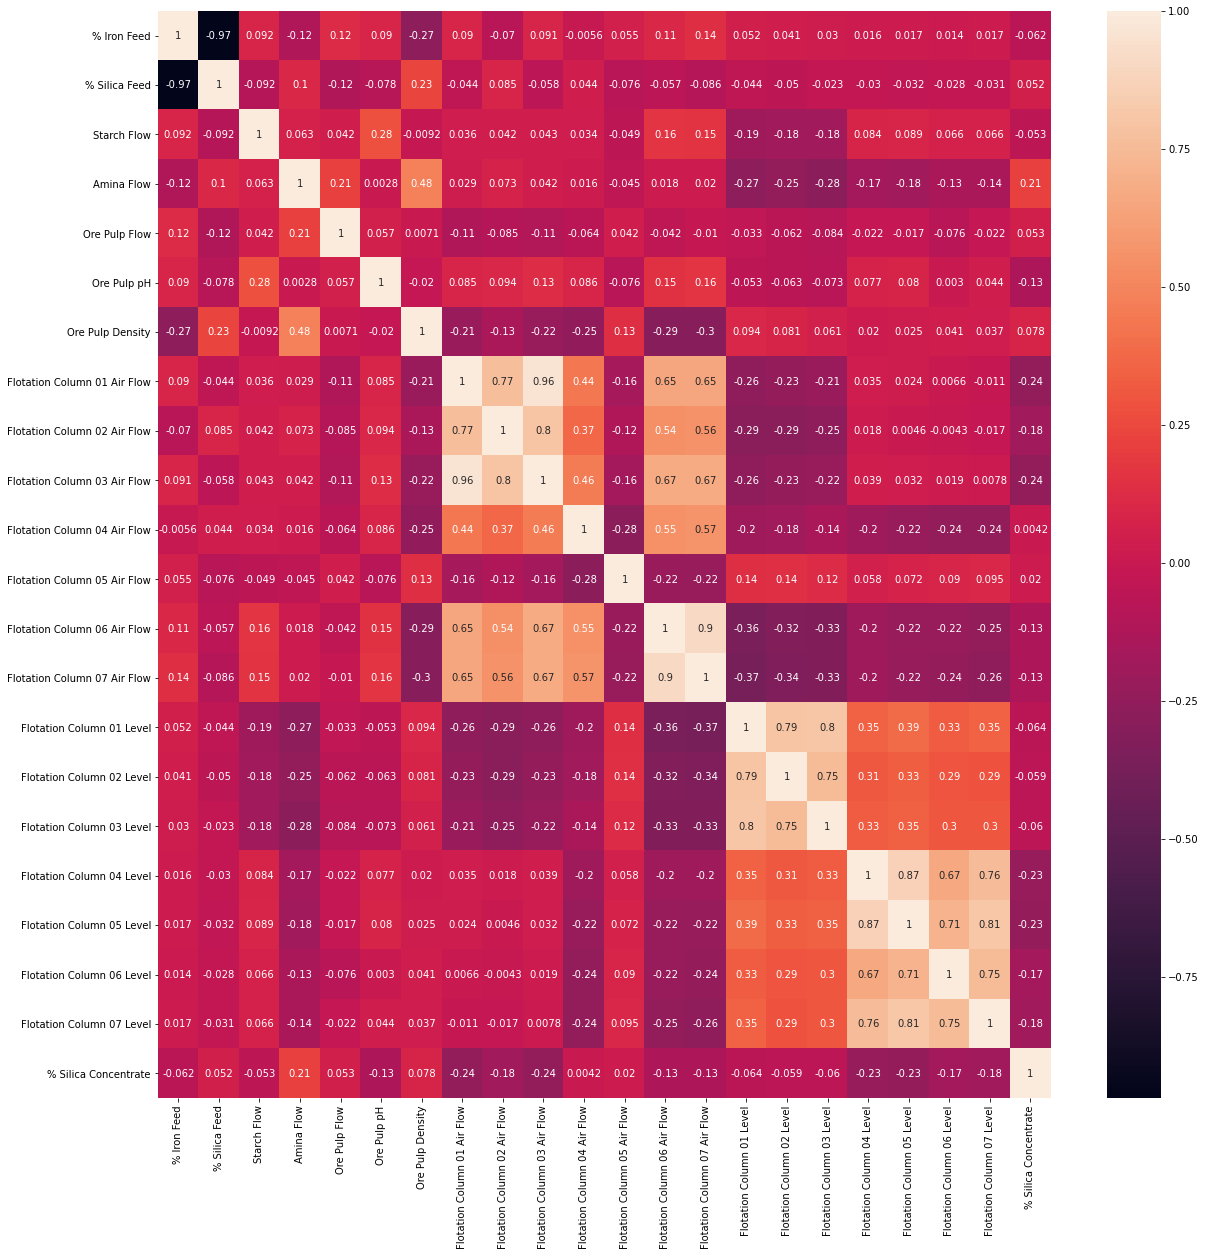

In [24]:
# Finding of Correlation among the Features
import seaborn as sns
ml_mining_data=df_copy
plt.figure(figsize=(20, 20))
p = sns.heatmap(ml_mining_data.corr(), annot=True);

In [25]:
# Extraction of Features

df=ml_mining_data.drop(['% Silica Feed', 'Starch Flow','Ore Pulp Flow','Flotation Column 01 Air Flow',
                        'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow','Flotation Column 05 Air Flow',
                        'Flotation Column 01 Level','Flotation Column 02 Level', 'Flotation Column 03 Level', 
                        'Flotation Column 05 Level','Flotation Column 06 Level'], axis = 1) 


#Decision Criteria was based on
#1) correlation of feature to target variable (note some features with low correlation were included because of meeting criteria #3)
#2) removing collinier data points to prevent overfitting
#3) Reviewing the distribution of features and ensuring the feature has continous distribution. (note, some with bad distrib were kept because of #1)
        
#commented below are the columns to keep based on manual Decisions on which columns to keep to and remove.
#ml_mining_data['% Iron Feed', 'Amina Flow','Ore Pulp pH', 'Flotation Column 02 Air Flow',
                          #   'Flotation Column 06 Air Flow','Flotation Column 07 Air Flow', 
                           #  'Flotation Column 04 Level', 'Flotation Column 07 Level',
                            # '% Silica Concentrate']

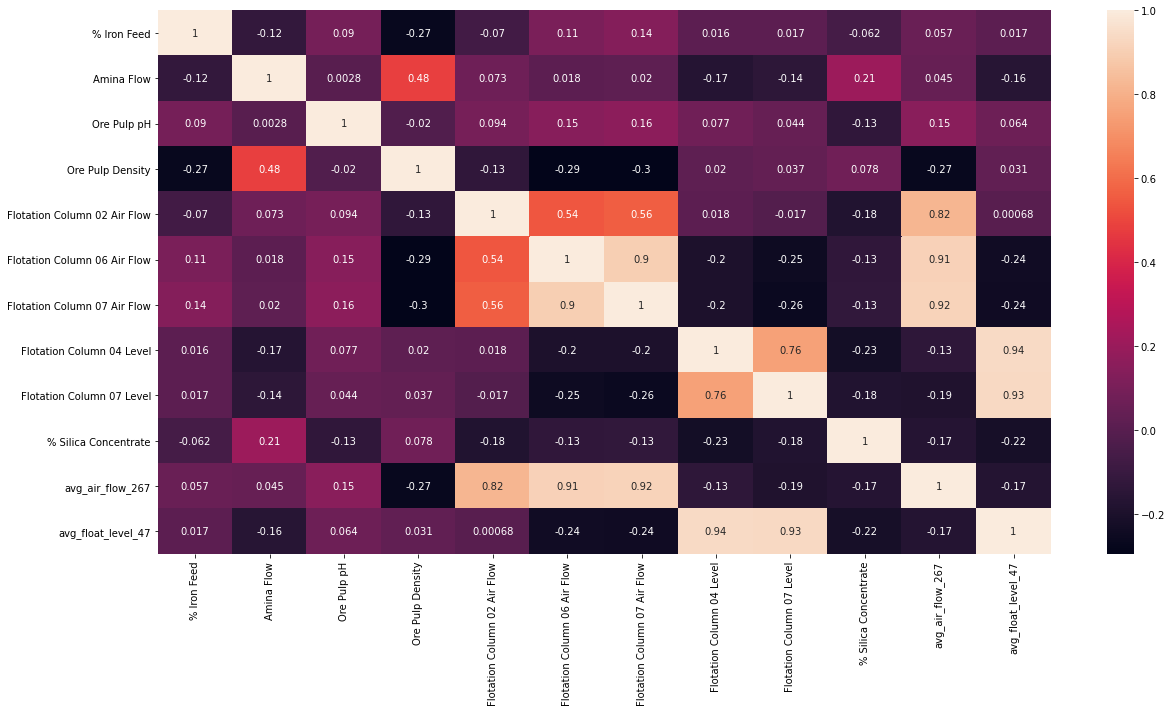

In [26]:
#combining remaining air flow features by taking their mean, and similarly for the level data. This decision was made given how close the data was to one another
# This would also help later on when building the machine learning models given the less columns that have to be considered


df.head()

# Average of the colomns
df['avg_air_flow_267'] = df[['Flotation Column 02 Air Flow','Flotation Column 06 Air Flow',
                             'Flotation Column 07 Air Flow']].mean(axis=1)
df['avg_float_level_47'] = df[['Flotation Column 04 Level', 'Flotation Column 07 Level']].mean(axis=1)
df.head()
plt.figure(figsize=(20, 10))
p = sns.heatmap(df.corr(), annot=True);

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 346475 entries, 2017-03-10 01:00:00 to 2017-09-09 22:00:00
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   avg_air_flow_267      346475 non-null  float64
 1   avg_float_level_47    346475 non-null  float64
 2   % Iron Feed           346475 non-null  float64
 3   Amina Flow            346475 non-null  float64
 4   Ore Pulp pH           346475 non-null  float64
 5   Ore Pulp Density      346475 non-null  float64
 6   % Silica Concentrate  346475 non-null  float64
dtypes: float64(7)
memory usage: 21.1 MB


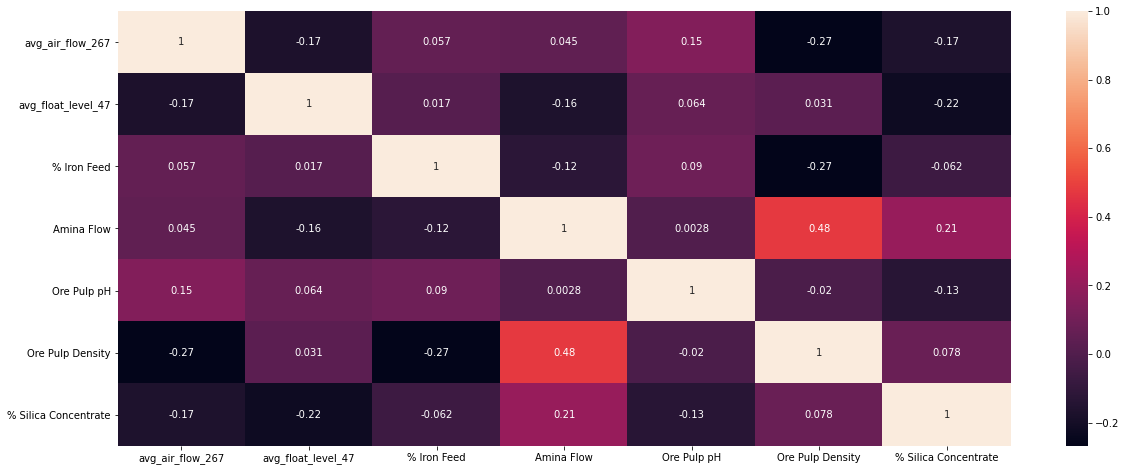

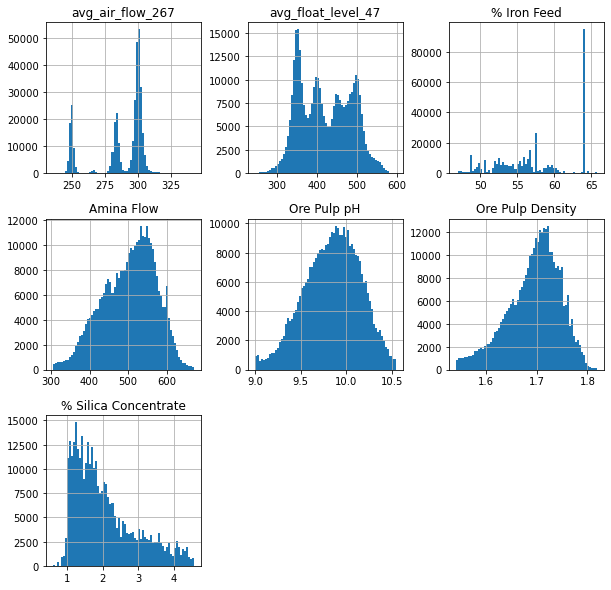

Text(0.5, 0.98, 'figure title')

<Figure size 432x288 with 0 Axes>

In [27]:
#Further cleaning of dataset and final view of correlations

df_ml=df.drop(['Flotation Column 02 Air Flow','Flotation Column 06 Air Flow','Flotation Column 07 Air Flow',
               'Flotation Column 04 Level', 'Flotation Column 07 Level'], axis = 1) 
df_ml.head()
cols = df_ml.columns.tolist()
cols
cols = cols[-1:] + cols[:-1]
cols = cols[-1:] + cols[:-1]
df_ml = df_ml[cols]
df_ml.head()
df_ml.info()
plt.figure(figsize=(20, 8))
p = sns.heatmap(df_ml.corr(), annot=True);

df_ml.hist(bins = 70, figsize = (10,10))
plt.show()
plt.suptitle('figure title', color='w')

In [28]:
#change"<mention your location path>"with the file path to where you want to save your excel file TO run the code
export_csv = df_ml.to_csv(header= True, index=True) 

In [29]:
# Importing of Libraries
import pandas as pd
import numpy as np

In [30]:

body = client_c930604ce6224217a4557cf932839f5c.get_object(Bucket='estimateimpurities-donotdelete-pr-dbfopkjaqszf6c',Key='Enhanced_Mining_dataset.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_csv(body,sep=',')
dataset=dataset.set_index('date')
dataset.head()


,avg_air_flow_267,avg_float_level_47,% Iron Feed,Amina Flow,Ore Pulp pH,Ore Pulp Density,% Silica Concentrate
date,,,,,,,
2017-03-10 01:00:00,251.448000,483.4510,55.2,557.434,10.0664,1.74,1.31
2017-03-10 01:00:00,249.887667,473.0805,55.2,563.965,10.0672,1.74,1.31
2017-03-10 01:00:00,249.096667,454.1275,55.2,568.054,10.0680,1.74,1.31
2017-03-10 01:00:00,252.018667,436.9395,55.2,568.665,10.0689,1.74,1.31
2017-03-10 01:00:00,250.349000,439.6745,55.2,558.167,10.0697,1.74,1.31


In [31]:
# Spliting of Dataset into Independent & Dependent Variables

#Independent Variables
x=dataset.iloc[:,:-1].values

#Dependent Variable
y=dataset.iloc[:,-1].values

In [32]:
# Independent Variables
x

array([[251.448     , 483.451     ,  55.2       , 557.434     ,
         10.0664    ,   1.74      ],
       [249.88766667, 473.0805    ,  55.2       , 563.965     ,
         10.0672    ,   1.74      ],
       [249.09666667, 454.1275    ,  55.2       , 568.054     ,
         10.068     ,   1.74      ],
       ...,
       [321.91983333, 444.47      ,  49.75      , 501.668     ,
          9.75384   ,   1.71849   ],
       [320.522     , 434.3475    ,  49.75      , 501.514     ,
          9.74102   ,   1.71701   ],
       [319.41466667, 389.8735    ,  49.75      , 483.383     ,
          9.73784   ,   1.7091    ]])

In [33]:
# Dependent Variable
y

array([1.31, 1.31, 1.31, ..., 1.96, 1.96, 1.96])

In [34]:
# Spliting of Dataset into Trainset & Testset

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [35]:
# Importing the Random forest regressor model
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=42,criterion='mse')
# Fitting the Random forest regressor to x_train & y_train
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=42)

In [36]:
# Prediction

y_pred=model.predict(x_test)
y_pred

array([1.23714286, 1.23      , 1.90690476, ..., 3.33      , 2.36428571,
       2.86761905])

In [37]:
# Finding Accuracy of the model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9165241804323155

In [38]:
model.predict([[251.448000,483.4510,55.20,557.434,10.06640,1.74000]])

array([1.30428571])

In [47]:
import ibm_watson_machine_learning

In [48]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

In [49]:
wml_credentials = {
    "apikey" :"hJ9BVcq2J8gyQqQ0NrhqwCqD7_lEESdjeLicee-KGKr3",
    "url" : "https://eu-de.ml.cloud.ibm.com"
}

In [61]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  --------  ------------------------
ID                                    NAME      CREATED
bb2e2a50-0cb4-4ffa-a373-7576c22e6844  iron_new  2022-03-29T10:16:02.639Z
------------------------------------  --------  ------------------------


In [62]:
SPACE_ID = "bb2e2a50-0cb4-4ffa-a373-7576c22e6844"

In [63]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [64]:
MODEL_NAME = "iron prediction"
DEPLOYMENT_NAME = "iron deployment"
BEST_MODEL= model

In [65]:
software_spec_uid = wml_client.software_specifications.get_id_by_name("default_py3.8")

model_props = {
    wml_client.repository.ModelMetaNames.NAME:MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE:'scikit-learn_0.23',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID : software_spec_uid
}

In [66]:
model_details = wml_client.repository.store_model(
    model = BEST_MODEL,
    meta_props = model_props,
    training_data = x_train,
    training_target =y_train
)

Note: Warnings!! :  Software specification default_py3.8 specified for the wml_model is deprecated and will be removed in the future. We recommend you use runtime-22.1-py3.9 instead. For details see Supported Frameworks https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/pm_service_supported_frameworks.html


In [67]:
software_spec_uid 

'ab9e1b80-f2ce-592c-a7d2-4f2344f77194'

In [68]:
model_uid = wml_client.repository.get_model_id(model_details)

In [69]:
model_uid

'5ececd02-efb8-4b63-84fe-ac5bb236126a'

In [70]:
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE:{}
}

In [71]:
deployment = wml_client.deployments.create(artifact_uid=model_uid,meta_props=deployment_props)



#######################################################################################

Synchronous deployment creation for uid: '5ececd02-efb8-4b63-84fe-ac5bb236126a' started

#######################################################################################


initializing
Note: Software specification default_py3.8 is deprecated. Use runtime-22.1-py3.9 software specification instead. For details, see https://dataplatform.cloud.ibm.com/docs/content/wsj/wmls/wmls-deploy-python-types.html?context=cpdaas.
.
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='7504ac39-eb03-4fcf-86b7-22c6deb948c0'
------------------------------------------------------------------------------------------------


